# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



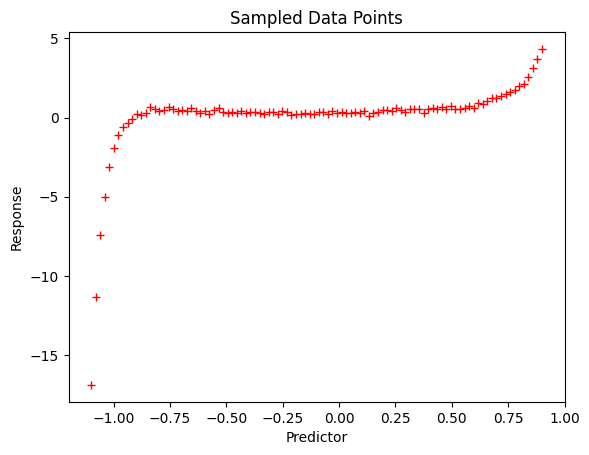

In [ ]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1
    return x, y, coeff

predictor, response, coeff_original = gen_data()
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

Part 1: fitting $(y=\beta_1x+\beta_0)$

In [ ]:
class LinearRegression:

    def __init__(self, lr=0.001, epoch=1000):
        # {y = w^T.x + b}
        self.w = None
        self.b = None
        self.lr = lr
        self.epoch = epoch

    def fit(self, X, y):
        samples_cnt, features_cnt = X.shape
        self.w = np.zeros(features_cnt) # 2ways => 1. random, 2. zero
        self.b = 0                         # 2ways => 1. random, 2. zero
        if samples_cnt == 0:
            return

        for i in range(self.epoch):
            y_pred = np.dot(X, self.w)
            y_pred += self.b 

            dw = (1/samples_cnt)
            dw *= np.dot(X.T, (y_pred-y))
            db = (1/samples_cnt)
            db *= np.sum(y_pred-y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.w) + self.b
        return y_pred

    def print_equ(self):
        print("weights: ", self.w)
        print("bias: ", self.b)


In [ ]:
X, y,coeff = gen_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

weights:  [1.04561784]
bias:  0.03646371469660932
Best Learning Rate: 0.0041035635635635614
Final Mean Squared Error (MSE) on Test Data: 1.181530492372522


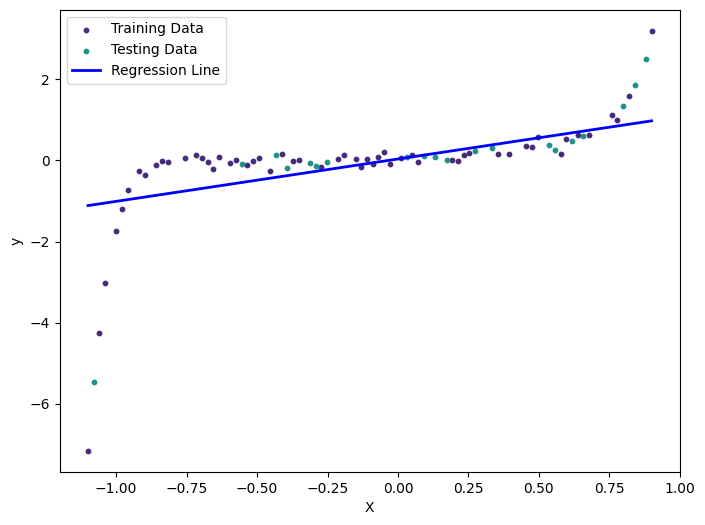

In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

best_lr = None
best_mse = float('inf')

lr_values = np.linspace(0.99999, 0.0001, 1000)
for lr in lr_values:
    reg = LinearRegression(lr=lr, epoch=1000)
    X_train_reshaped = X_train.reshape(-1, 1)
    X_val_reshaped = X_val.reshape(-1, 1)
    reg.fit(X_train_reshaped, y_train)
    predictions = reg.predict(X_val_reshaped)
    mse_value = np.mean((y_val - predictions)**2)

    if mse_value < best_mse:
        best_mse = mse_value
        best_lr = lr

reg = LinearRegression(lr=best_lr, epoch=1000)
X_train_final = X_train.reshape(-1, 1)
X_test_final = X_test.reshape(-1, 1)
reg.fit(X_train_final, y_train)
predictions = reg.predict(X_test_final)
reg.print_equ()
final_mse = np.mean((y_test - predictions)**2)


print("Best Learning Rate:", best_lr)
print("Final Mean Squared Error (MSE) on Test Data:", final_mse)

y_pred_line = reg.predict(X.reshape(-1, 1))
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(8, 6))
plt.scatter(X_train_final, y_train, color=cmap(0.12), s=10, label='Training Data')
plt.scatter(X_test_final, y_test, color=cmap(0.5), s=10, label='Testing Data')
plt.plot(X, y_pred_line, color='blue', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

def poly_features(X, degree):
    X_poly = np.zeros((len(X), degree + 1))
    for i in range(degree + 1):
        X_poly[:, i] = X ** i
    return X_poly

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent
def gradient_descent(X, y, lr, iterations, degree):
    m = len(y)
    X_poly = poly_features(X, degree)
    theta = np.random.randn(degree + 1, 1)
    for _ in range(iterations):
        gradient = 2/m * X_poly.T.dot(X_poly.dot(theta) - y.reshape(-1, 1))
        theta -= lr * gradient
    return theta

def cross_validation(X, y, lr, iterations, degree, k=5):
    kf = KFold(n_splits=k)
    mse_values = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        theta = gradient_descent(X_train, y_train, lr, iterations, degree)
        X_test_poly = poly_features(X_test, degree)
        y_pred = X_test_poly.dot(theta)
        mse_ = mse(y_test, y_pred)
        mse_values.append(mse_)

    return np.mean(mse_values)

### finding best degree

Best Degree: 11


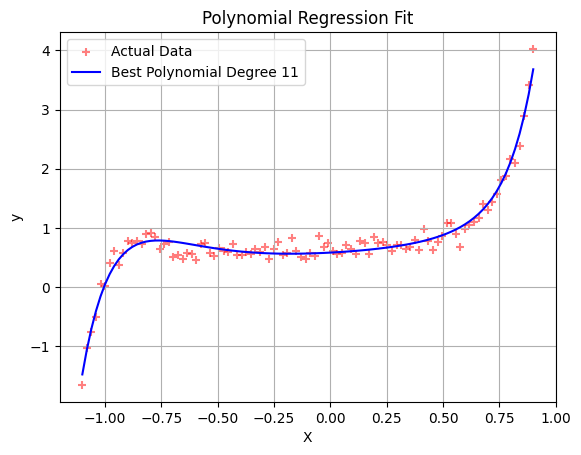

In [ ]:
# Main
X, y, true_coefficients = gen_data()
degrees_to_try = range(1, 26)
mse_values = []
lr = 0.01
iterations = 10000

for degree in degrees_to_try:
    avg_mse = cross_validation(X, y, lr, iterations, degree)
    mse_values.append(avg_mse)

best_degree = degrees_to_try[np.argmin(mse_values)]
best_theta = gradient_descent(X, y, lr, iterations, best_degree)
print(f'Best Degree: {best_degree}')


# Plot
plt.scatter(X, y, color='red', marker = '+',label='Actual Data', alpha=0.5)

X_range = np.linspace(min(X), max(X), 100)
X_range_poly = poly_features(X_range, best_degree)
y_range_pred = X_range_poly.dot(best_theta)
plt.plot(X_range, y_range_pred, color='blue', label=f'Best Polynomial Degree {best_degree}')

plt.title('Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


 how well the coefficients match when we try to fit a 25 degree polynomial to the data.

True coefficients: [0.43059459 0.91891669 0.69857385 0.57125735 0.11170336 0.67371904
 0.27824336 0.06076038 0.5731358  0.26349937 0.06862236 0.55371312
 0.49179232 0.36886366 0.25255033 0.68566205 0.35296344 0.52420911
 0.02029018 0.17749918 0.134443   0.87826427 0.03023574 0.74849149
 0.52070954 0.12931702]
Predicted coefficients for fitted degree: [ 0.48457451  0.76618771 -0.05369558  0.71969858  1.58219938  1.01806092
  0.70979378  0.85053347 -0.54729065 -0.09084877  1.92271397  0.39417176
 -0.83088897 -0.60891925 -0.74207651  0.24744767 -0.53375881 -1.01623766
 -2.26321947  0.2373574   2.27772935  0.99756307  0.20960554  2.24746416
 -0.28560887 -1.26200793]


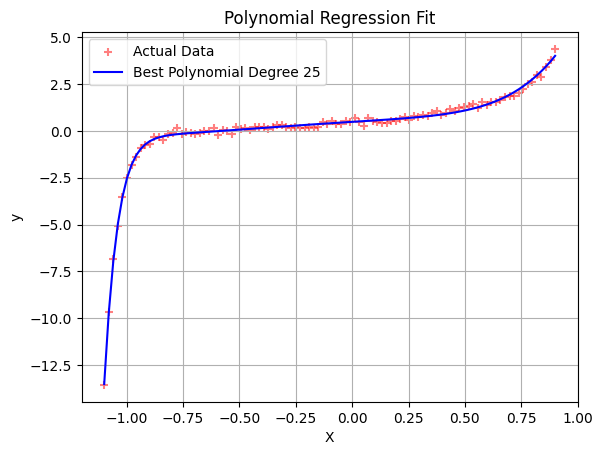

In [ ]:
# Main
X, y, true_coefficients = gen_data()
degree_to_fit = 25
mse_values = []
lr = 0.01
iterations = 10000

best_degree = degree_to_fit
best_theta = gradient_descent(X, y, lr, iterations, best_degree)

print("True coefficients:", true_coefficients)
print("Predicted coefficients for fitted degree:", best_theta.flatten())

X_poly = poly_features(X, best_degree)
y_pred = X_poly.dot(best_theta)
mse_value = mse(y, y_pred)
mse_values.append(mse_value)


# Plot
plt.scatter(X, y, color='red', marker='+', label='Actual Data', alpha=0.5)

X_range = np.linspace(min(X), max(X), 100)
X_range_poly = poly_features(X_range, best_degree)
y_range_pred = X_range_poly.dot(best_theta)
plt.plot(X_range, y_range_pred, color='blue', label=f'Best Polynomial Degree {best_degree}')

plt.title('Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

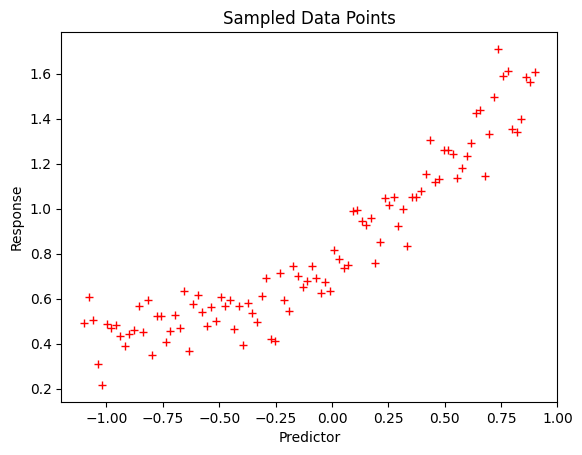

In [ ]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

def poly_features(X, degree):
    X_poly = np.zeros((len(X), degree + 1))
    for i in range(degree + 1):
        X_poly[:, i] = X ** i
    return X_poly

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent
def gradient_descent(X, y, lr, iterations, degree, lambda_l1=0, lambda_l2=0):
    m = len(y)
    X_poly = poly_features(X, degree)
    theta = np.random.randn(degree + 1, 1)
    for _ in range(iterations):
        y_pred = X_poly.dot(theta)
        gradient = 2/m * X_poly.T.dot(y_pred - y.reshape(-1, 1)) + lambda_l2/m * theta + lambda_l1/m * np.sign(theta)
        theta -= lr * gradient
    return theta

def cross_validation(X, y, lr, iterations, degree, k=5):
    kf = KFold(n_splits=k)
    mse_values = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        theta = gradient_descent(X_train, y_train, lr, iterations, degree)
        X_test_poly = poly_features(X_test, degree)
        y_pred = X_test_poly.dot(theta)
        mse_ = mse(y_test, y_pred)
        mse_values.append(mse_)

    return np.mean(mse_values)




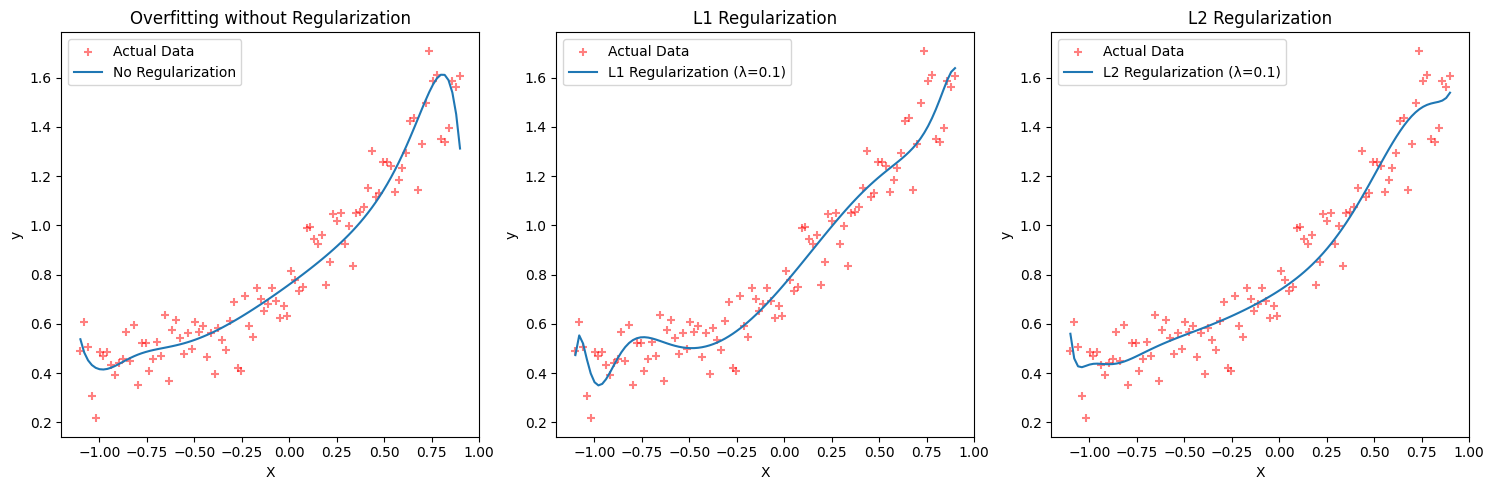

In [ ]:
X_low = predictor_low
y_low = response_low

degree_to_fit = 25
lr = 0.01
iterations = 10000
lambda_l1 = 0.1  # L1 regularization
lambda_l2 = 0.1  # L2 regularization

theta_no_reg = gradient_descent(X_low, y_low, lr, iterations, degree_to_fit)
theta_l1 = gradient_descent(X_low, y_low, lr, iterations, degree_to_fit, lambda_l1=lambda_l1)
theta_l2 = gradient_descent(X_low, y_low, lr, iterations, degree_to_fit, lambda_l2=lambda_l2)


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.scatter(X_low, y_low, color='red', marker='+', label='Actual Data', alpha=0.5)
X_range = np.linspace(min(X_low), max(X_low), 100)
X_range_poly = poly_features(X_range, degree_to_fit)
y_range_pred_no_reg = X_range_poly.dot(theta_no_reg)
plt.plot(X_range, y_range_pred_no_reg, label='No Regularization')
plt.title('Overfitting without Regularization')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


plt.subplot(1, 3, 2)
plt.scatter(X_low, y_low, color='red', marker='+', label='Actual Data', alpha=0.5)
y_range_pred_l1 = X_range_poly.dot(theta_l1)
plt.plot(X_range, y_range_pred_l1, label=f'L1 Regularization (λ={lambda_l1})')
plt.title('L1 Regularization')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


plt.subplot(1, 3, 3)
plt.scatter(X_low, y_low, color='red', marker='+', label='Actual Data', alpha=0.5)
y_range_pred_l2 = X_range_poly.dot(theta_l2)
plt.plot(X_range, y_range_pred_l2, label=f'L2 Regularization (λ={lambda_l2})')
plt.title('L2 Regularization')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
mse_no_reg = mse(y_low, y_range_pred_no_reg)
mse_l1 = mse(y_low, y_range_pred_l1)
mse_l2 = mse(y_low, y_range_pred_l2)

results_df = pd.DataFrame({
    'Regularization Type': ['No Regularization', 'L1 Regularization', 'L2 Regularization'],
    'MSE': [mse_no_reg, mse_l1, mse_l2]
})

print(results_df)


  Regularization Type       MSE
0   No Regularization  0.264620
1   L1 Regularization  0.263769
2   L2 Regularization  0.262837


### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [ ]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


Best Learning Rate: 0.02532525050100201
Mean Squared Error (MSE) on Test Data: 17135.206491114695


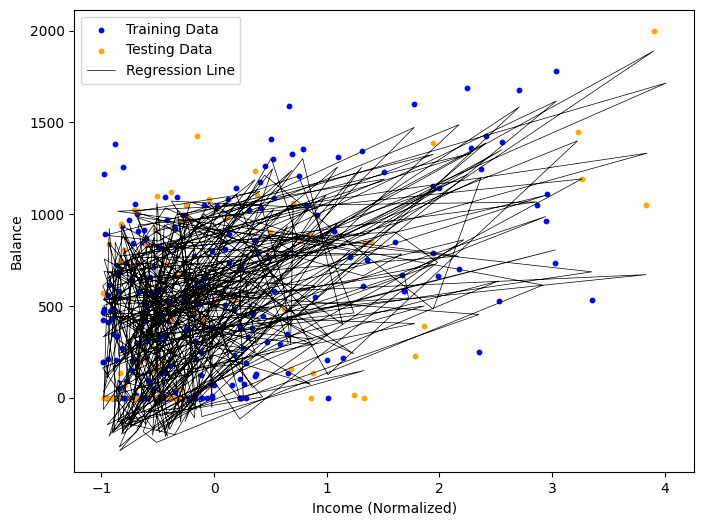

In [ ]:
X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = credit['Balance']

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

best_lr = None
best_mse = float('inf')

# Hyperparameter tuning
lr_values = np.linspace(0.1, 0.0001, 500)
for lr in lr_values:
    reg = LinearRegression(lr=lr, epoch=1000)
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_val)
    mse_value = mse(y_val, predictions)

    if mse_value < best_mse:
        best_mse = mse_value
        best_lr = lr

print(f"Best Learning Rate: {best_lr}")
# print(f"Best MSE on Validation Data: {best_mse}")

reg = LinearRegression(lr=best_lr, epoch=10000)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
final_mse = mse(y_test, predictions)

print("Mean Squared Error (MSE) on Test Data:", final_mse)
y_pred_line = reg.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Income'], y_train, color='blue', s=10, label='Training Data')
plt.scatter(X_test['Income'], y_test, color='orange', s=10, label='Testing Data')
plt.plot(X['Income'], y_pred_line, color='black', linewidth=0.5, label='Regression Line')
plt.xlabel('Income (Normalized)')
plt.ylabel('Balance')
plt.legend()
plt.show()

###Test whether all the variables are needed to predict Balance or if any of them can be discarded.

In [ ]:
import statsmodels.api as sm
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const).fit()
print(model.summary())

# High p-values (greater than a significance threshold, typically 0.05) indicate
# that the predictor may not be statistically significant in predicting the
# response variable and can potentially be discarded.

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     268.0
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.14e-97
Time:                        13:46:56   Log-Likelihood:                -1448.9
No. Observations:                 224   AIC:                             2912.
Df Residuals:                     217   BIC:                             2936.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.1425     10.647     48.196      0.0

Rating, Cards, Age, Education have "p" value greater than 0.05 so it indicates that they can potentially discarded.

Testing results after removing above columns

Best Learning Rate: 0.1
Mean Squared Error (MSE) on Test Data: 18818.567036445722


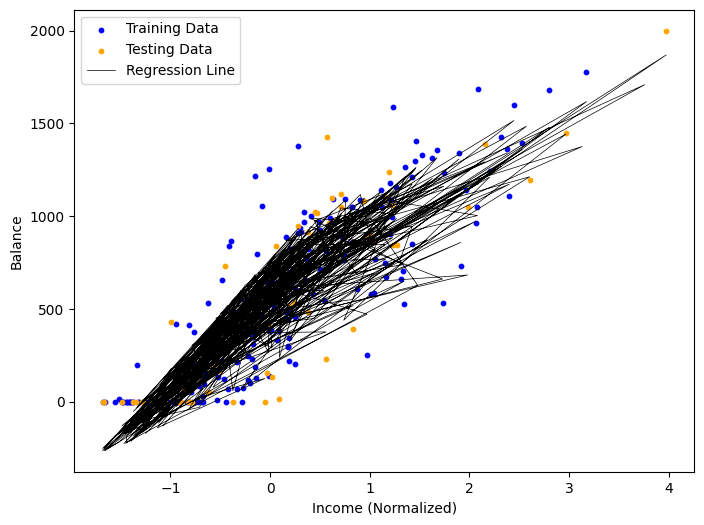

In [ ]:
X = credit[['Income', 'Limit']]
y = credit['Balance']

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

best_lr = None
best_mse = float('inf')

# Hyperparameter tuning
lr_values = np.linspace(0.1, 0.0001, 1000)
for lr in lr_values:
    reg = LinearRegression(lr=lr, epoch=1000)
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_val)
    mse_value = mse(y_val, predictions)

    if mse_value < best_mse:
        best_mse = mse_value
        best_lr = lr

print(f"Best Learning Rate: {best_lr}")
# print(f"Best MSE on Validation Data: {best_mse}")

reg = LinearRegression(lr=best_lr, epoch=1000)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
final_mse = mse(y_test, predictions)

print("Mean Squared Error (MSE) on Test Data:", final_mse)
y_pred_line = reg.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Limit'], y_train, color='blue', s=10, label='Training Data')
plt.scatter(X_test['Limit'], y_test, color='orange', s=10, label='Testing Data')
plt.plot(X['Limit'], y_pred_line, color='black', linewidth=0.5, label='Regression Line')
plt.xlabel('Income (Normalized)')
plt.ylabel('Balance')
plt.legend()
plt.show()

Best Learning Rate: 0.033533466933867745
Mean Squared Error (MSE) on Test Data: 16783.79804430828


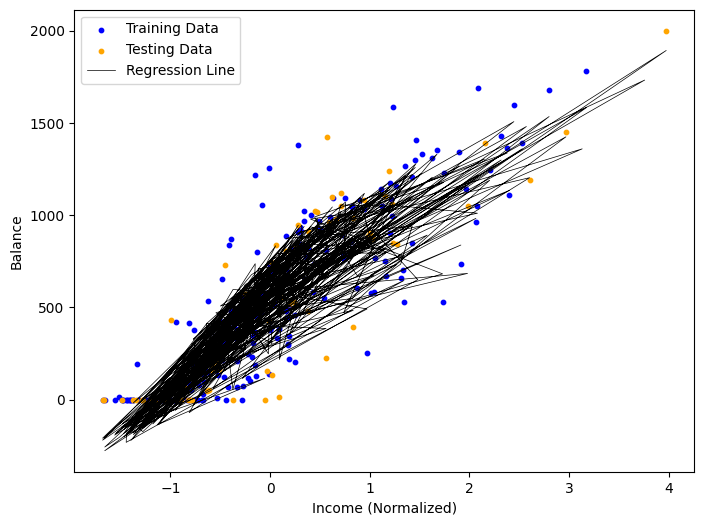

In [ ]:
X = credit[['Income', 'Limit', 'Rating']]
y = credit['Balance']

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

best_lr = None
best_mse = float('inf')

# Hyperparameter tuning
lr_values = np.linspace(0.1, 0.0001, 500)
for lr in lr_values:
    reg = LinearRegression(lr=lr, epoch=1000)
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_val)
    mse_value = mse(y_val, predictions)

    if mse_value < best_mse:
        best_mse = mse_value
        best_lr = lr

print(f"Best Learning Rate: {best_lr}")
# print(f"Best MSE on Validation Data: {best_mse}")

reg = LinearRegression(lr=0.1, epoch=1000)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
final_mse = mse(y_test, predictions)

print("Mean Squared Error (MSE) on Test Data:", final_mse)
y_pred_line = reg.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Limit'], y_train, color='blue', s=10, label='Training Data')
plt.scatter(X_test['Limit'], y_test, color='orange', s=10, label='Testing Data')
plt.plot(X['Limit'], y_pred_line, color='black', linewidth=0.5, label='Regression Line')
plt.xlabel('Income (Normalized)')
plt.ylabel('Balance')
plt.legend()
plt.show()

### Test for interaction effects between Rating and Age.

In [ ]:
credit = pd.read_csv('credit.csv')
credit.head()
credit['Rating_Age'] = credit['Rating'] * credit['Age']

X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Rating_Age']]
y = credit['Balance'].values

X_standardized = (X - X.mean()) / X.std()
X_standardized_with_intercept = sm.add_constant(X_standardized)

model = sm.OLS(y, X_standardized_with_intercept)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     404.6
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          5.13e-175
Time:                        14:04:51   Log-Likelihood:                -2597.9
No. Observations:                 400   AIC:                             5212.
Df Residuals:                     392   BIC:                             5244.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        520.0150      8.087     64.305      0.0

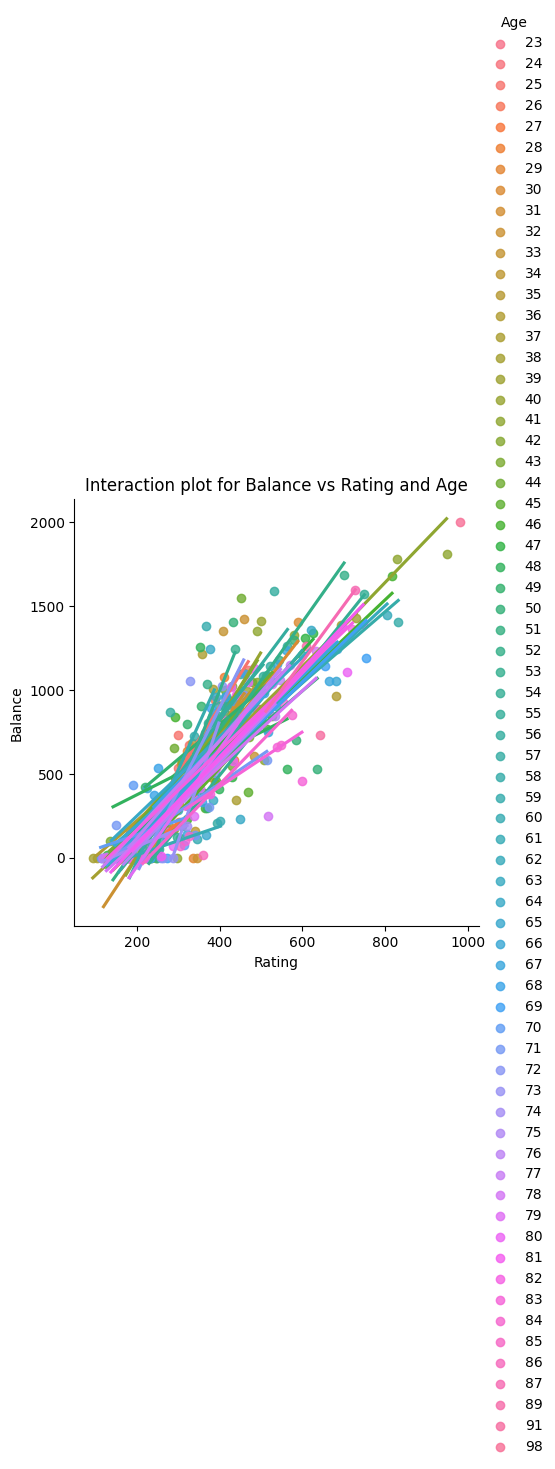

In [ ]:
import seaborn as sns
sns.lmplot(x='Rating', y='Balance', hue='Age', data=credit, ci=None)

plt.title('Interaction plot for Balance vs Rating and Age')
plt.xlabel('Rating')
plt.ylabel('Balance')
plt.show()

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [ ]:
sharks = pd.read_csv('/content/shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X = sharks[['IceCreamSales', 'Temperature', 'Month', 'Year']]
y = sharks['SharkAttacks']

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse_value = mse(y_test, predictions)

print("Mean Squared Error (MSE) on Test Data:", mse_value)

Mean Squared Error (MSE) on Test Data: 107.07991575483729


In [ ]:
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           SharkAttacks   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     22.23
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.04e-11
Time:                        14:04:55   Log-Likelihood:                -211.27
No. Observations:                  67   AIC:                             432.5
Df Residuals:                      62   BIC:                             443.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            34.7134      0.724     47.957

In [ ]:
X = sharks[['Temperature', 'Month', 'Year']]
y = sharks['SharkAttacks']
X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse_value = mse(y_test, predictions)

print("Mean Squared Error (MSE) on Test Data:", mse_value)

Mean Squared Error (MSE) on Test Data: 98.81622040518658


## Results observed

1. These results suggest that omitting the IceCreamSales variable slightly decreases the MSE
2. this indicate a marginal improvement in the model's predictive performance on the test data.
3. Thus this is consistent with the concept that correlation does not imply causation, and that including a less relevant variable (IceCreamSales in this case) might not necessarily lead to a better predictive model for shark attacks